In [1]:
import pandas as pd

# Load your dataset (with the correct relative file path)
file_path = "./Food Waste data and research - by country.csv"
df = pd.read_csv(file_path)

# Function to print basic information about the dataset
def dataset_overview(dataframe):
    print("Dataset Overview:")
    
    # Display the column names
    print("\nColumn Names:")
    print(dataframe.columns.tolist())
    
    # Display the number of rows and columns
    print("\nShape of the Dataset:")
    print(f"Rows: {dataframe.shape[0]}, Columns: {dataframe.shape[1]}")
    
    # Display basic statistics of numeric columns
    print("\nBasic Statistics (Numeric Columns):")
    print(dataframe.describe())
    
    # Display the first few rows of the dataset to understand the structure
    print("\nFirst 5 Rows:")
    print(dataframe.head())
    
    # Display information about missing values
    print("\nMissing Values Information:")
    print(dataframe.isnull().sum())

# Call the function to display dataset overview
dataset_overview(df)


Dataset Overview:

Column Names:
['Country', 'combined figures (kg/capita/year)', 'Household estimate (kg/capita/year)', 'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (kg/capita/year)', 'Food service estimate (tonnes/year)', 'Confidence in estimate', 'M49 code', 'Region', 'Source']

Shape of the Dataset:
Rows: 214, Columns: 12

Basic Statistics (Numeric Columns):
       combined figures (kg/capita/year)  Household estimate (kg/capita/year)  \
count                         214.000000                           214.000000   
mean                          126.794393                            84.294393   
std                            22.157879                            18.313705   
min                            61.000000                            33.000000   
25%                           115.000000                            74.000000   
50%                           123.000000                          

In [2]:
import pandas as pd

# Load the dataset
file_path = "./Food Waste data and research - by country.csv"
df = pd.read_csv(file_path)

# 1. Check for duplicates
print("Checking for duplicates...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If duplicates are found, remove them
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.")
else:
    print("No duplicates found.")

# 2. Check for missing values
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Since no missing values were reported earlier, we expect minimal cleaning here.
# We can handle missing values with imputation (if necessary) or remove rows/columns with too many nulls.

# 3. Ensure numerical columns are of correct type (especially the "tonnes/year" columns)
numerical_columns = [
    'combined figures (kg/capita/year)', 'Household estimate (kg/capita/year)',
    'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)', 
    'Retail estimate (tonnes/year)', 'Food service estimate (kg/capita/year)', 
    'Food service estimate (tonnes/year)', 'M49 code'
]

# Convert all numerical columns to appropriate data types (if they are not already)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# 4. Handle any potential outliers in the numeric columns
print("\nDetecting potential outliers...")
for col in numerical_columns:
    outliers = df[col][df[col] > df[col].quantile(0.99)]  # Checking for extreme high values (beyond 99th percentile)
    if len(outliers) > 0:
        print(f"Potential outliers detected in column {col}: {outliers.values}")
    else:
        print(f"No significant outliers detected in {col}.")

# 5. Normalize text columns by stripping whitespace and converting to lowercase where appropriate
df['Country'] = df['Country'].str.strip()
df['Region'] = df['Region'].str.strip()

# 6. Recheck data for final consistency and clean data
print("\nFinal dataset overview after cleaning:")
print(df.info())
print("\nSample data after cleaning:")
print(df.head())

# Save the cleaned dataset to a new file (optional)
cleaned_file_path = "./Cleaned_Food_Waste_by_Country.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved as: {cleaned_file_path}")


Checking for duplicates...
Number of duplicate rows: 0
No duplicates found.

Checking for missing values...
Missing values in each column:
 Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

Detecting potential outliers...
Potential outliers detected in column combined figures (kg/capita/year): [260 233 208]
Potential outliers detected in column Household estimate (kg/capita/year): [142 189 164]
Potential outliers detected in column Household estimate (tonnes/year): [91646213 68760163 37941470]
Potential

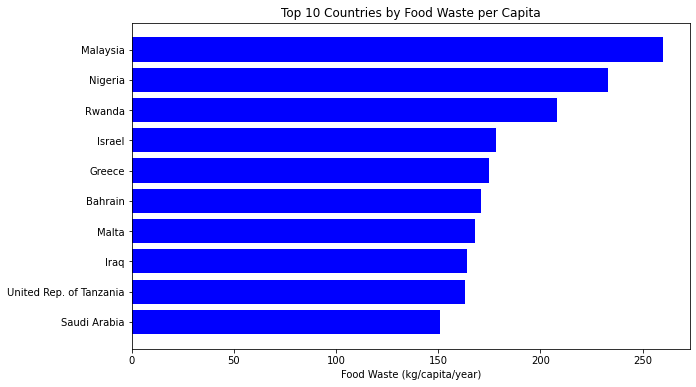

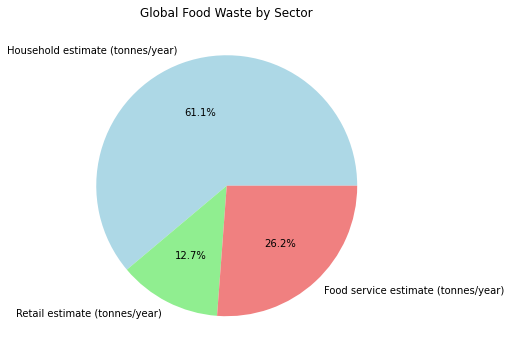

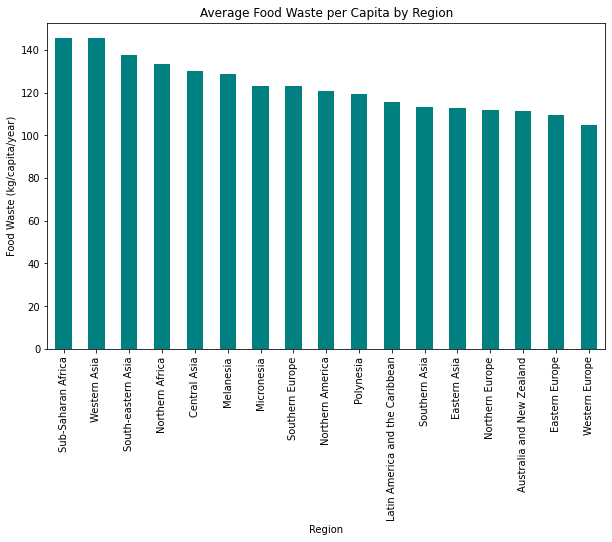

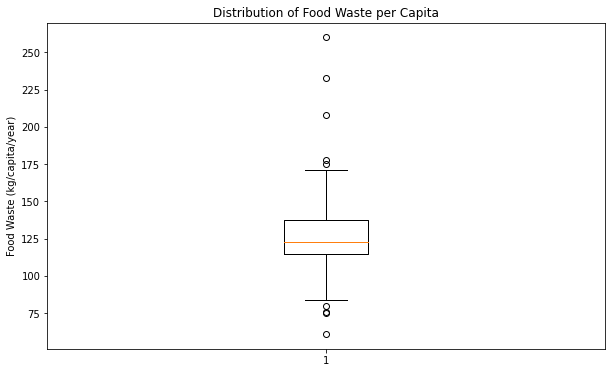

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "./Cleaned_Food_Waste_by_Country.csv"
df = pd.read_csv(file_path)

# 1. Global Food Waste Trends

# Sort countries by combined figures (kg/capita/year) to identify top food wasters
top_food_waste_countries = df[['Country', 'combined figures (kg/capita/year)']].sort_values(by='combined figures (kg/capita/year)', ascending=False)

# Plot the top 10 countries with the highest food waste per capita
plt.figure(figsize=(10,6))
plt.barh(top_food_waste_countries['Country'][:10], top_food_waste_countries['combined figures (kg/capita/year)'][:10], color='blue')
plt.xlabel('Food Waste (kg/capita/year)')
plt.title('Top 10 Countries by Food Waste per Capita')
plt.gca().invert_yaxis()  # Invert to have highest waste at the top
plt.show()

# 2. Sector-wise Food Waste

# Calculate the total food waste by each sector globally
sectors = ['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)']
global_sector_waste = df[sectors].sum()

# Plot the sector-wise contribution to global food waste
plt.figure(figsize=(8,6))
plt.pie(global_sector_waste, labels=sectors, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Global Food Waste by Sector')
plt.show()

# 3. Region-wise Comparison

# Group by region and calculate the average food waste per capita
region_food_waste = df.groupby('Region')['combined figures (kg/capita/year)'].mean().sort_values(ascending=False)

# Plot food waste by region
plt.figure(figsize=(10,6))
region_food_waste.plot(kind='bar', color='teal')
plt.xlabel('Region')
plt.ylabel('Food Waste (kg/capita/year)')
plt.title('Average Food Waste per Capita by Region')
plt.show()

# 4. Investigate Outliers in Food Waste

# Plot a boxplot to visualize the distribution of food waste across countries and detect outliers
plt.figure(figsize=(10,6))
plt.boxplot(df['combined figures (kg/capita/year)'])
plt.title('Distribution of Food Waste per Capita')
plt.ylabel('Food Waste (kg/capita/year)')
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the cleaned dataset
file_path = "./Cleaned_Food_Waste_by_Country.csv"
df = pd.read_csv(file_path)

# Ensure the directory for saving graphs exists
output_folder = "./Graphs"
os.makedirs(output_folder, exist_ok=True)

# Function to save graphs with proper names
def save_graph(plt, question_num):
    graph_path = os.path.join(output_folder, f'Q{question_num}.png')
    plt.savefig(graph_path)
    print(f"Graph for Question {question_num} saved at: {graph_path}")
    plt.close()

# 1. Which countries produce the most food waste per capita?
print("Q1: Which countries produce the most food waste per capita?")
top_food_waste_countries = df[['Country', 'combined figures (kg/capita/year)']].sort_values(by='combined figures (kg/capita/year)', ascending=False).head(10)
print(top_food_waste_countries)

# Generate and save graph for Q1
plt.figure(figsize=(10,6))
plt.barh(top_food_waste_countries['Country'], top_food_waste_countries['combined figures (kg/capita/year)'], color='blue')
plt.xlabel('Food Waste (kg/capita/year)')
plt.title('Top 10 Countries by Food Waste per Capita')
plt.gca().invert_yaxis()
save_graph(plt, 1)

# 2. What is the sector-wise distribution of food waste globally?
print("\nQ2: What is the sector-wise distribution of food waste globally?")
sectors = ['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)']
global_sector_waste = df[sectors].sum()
print(global_sector_waste)

# Generate and save graph for Q2
plt.figure(figsize=(8,6))
plt.pie(global_sector_waste, labels=sectors, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Global Food Waste by Sector')
save_graph(plt, 2)

# 3. How does food waste differ by region?
print("\nQ3: How does food waste differ by region?")
region_food_waste = df.groupby('Region')['combined figures (kg/capita/year)'].mean().sort_values(ascending=False)
print(region_food_waste)

# Generate and save graph for Q3
plt.figure(figsize=(10,6))
region_food_waste.plot(kind='bar', color='teal')
plt.xlabel('Region')
plt.ylabel('Food Waste (kg/capita/year)')
plt.title('Average Food Waste per Capita by Region')
save_graph(plt, 3)

# 4. Are there any significant outliers in food waste per capita among countries?
print("\nQ4: Are there any significant outliers in food waste per capita among countries?")
plt.figure(figsize=(10,6))
plt.boxplot(df['combined figures (kg/capita/year)'])
plt.title('Distribution of Food Waste per Capita')
plt.ylabel('Food Waste (kg/capita/year)')
save_graph(plt, 4)

# 5. Which region has the highest confidence in food waste estimates?
print("\nQ5: Which region has the highest confidence in food waste estimates?")
confidence_by_region = df.groupby('Region')['Confidence in estimate'].value_counts().unstack().fillna(0)
print(confidence_by_region)

# Generate and save graph for Q5
confidence_by_region.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Confidence in Food Waste Estimates by Region')
plt.xlabel('Region')
plt.ylabel('Count of Confidence Levels')
save_graph(plt, 5)

# 6. How does household food waste compare to retail and food service sectors within a region?
print("\nQ6: How does household food waste compare to retail and food service sectors within a region?")
region_sector_waste = df.groupby('Region')[['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)']].sum()
print(region_sector_waste)

# Generate and save graph for Q6
region_sector_waste.plot(kind='bar', figsize=(10,6))
plt.title('Sector-wise Food Waste by Region')
plt.xlabel('Region')
plt.ylabel('Total Food Waste (tonnes/year)')
save_graph(plt, 6)

# 7. What is the total global food waste (in tonnes) for each sector?
print("\nQ7: What is the total global food waste (in tonnes) for each sector?")
total_global_waste = df[sectors].sum()
print(total_global_waste)

# Generate and save graph for Q7
plt.figure(figsize=(8,6))
plt.pie(total_global_waste, labels=sectors, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Total Global Food Waste by Sector')
save_graph(plt, 7)


# 8. What is the range of food waste per capita within each region?
print("\nQ8: What is the range of food waste per capita within each region?")
region_range = df.groupby('Region')['combined figures (kg/capita/year)'].agg(['min', 'max', 'mean'])
print(region_range)

# Generate and save graph for Q9
region_range[['min', 'max']].plot(kind='bar', figsize=(10,6))
plt.title('Range of Food Waste per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Food Waste (kg/capita/year)')
save_graph(plt, 8)


print(f"\nAll graphs have been saved in the folder: {output_folder}")


Q1: Which countries produce the most food waste per capita?
                     Country  combined figures (kg/capita/year)
116                 Malaysia                                260
139                  Nigeria                                233
159                   Rwanda                                208
95                    Israel                                178
77                    Greece                                175
13                   Bahrain                                171
119                    Malta                                168
92                      Iraq                                164
203  United Rep. of Tanzania                                163
167             Saudi Arabia                                151
Graph for Question 1 saved at: ./Graphs\Q1.png

Q2: What is the sector-wise distribution of food waste globally?
Household estimate (tonnes/year)       569003670
Retail estimate (tonnes/year)          118137722
Food service estimate (to